In [2]:
#import libraries
import numpy as np
import torch

#new
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt

# IMport a dataset

In [3]:
# The list of datsets that come with torchvision

In [6]:
#download the cifar 10 dataset
cdata= torchvision.datasets.CIFAR10(root='cifar10',download=True)
print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [7]:
print(cdata.data.shape)

#the unique categories
print(cdata.classes)

# .targets  is a list of targets converted to ints
print( len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


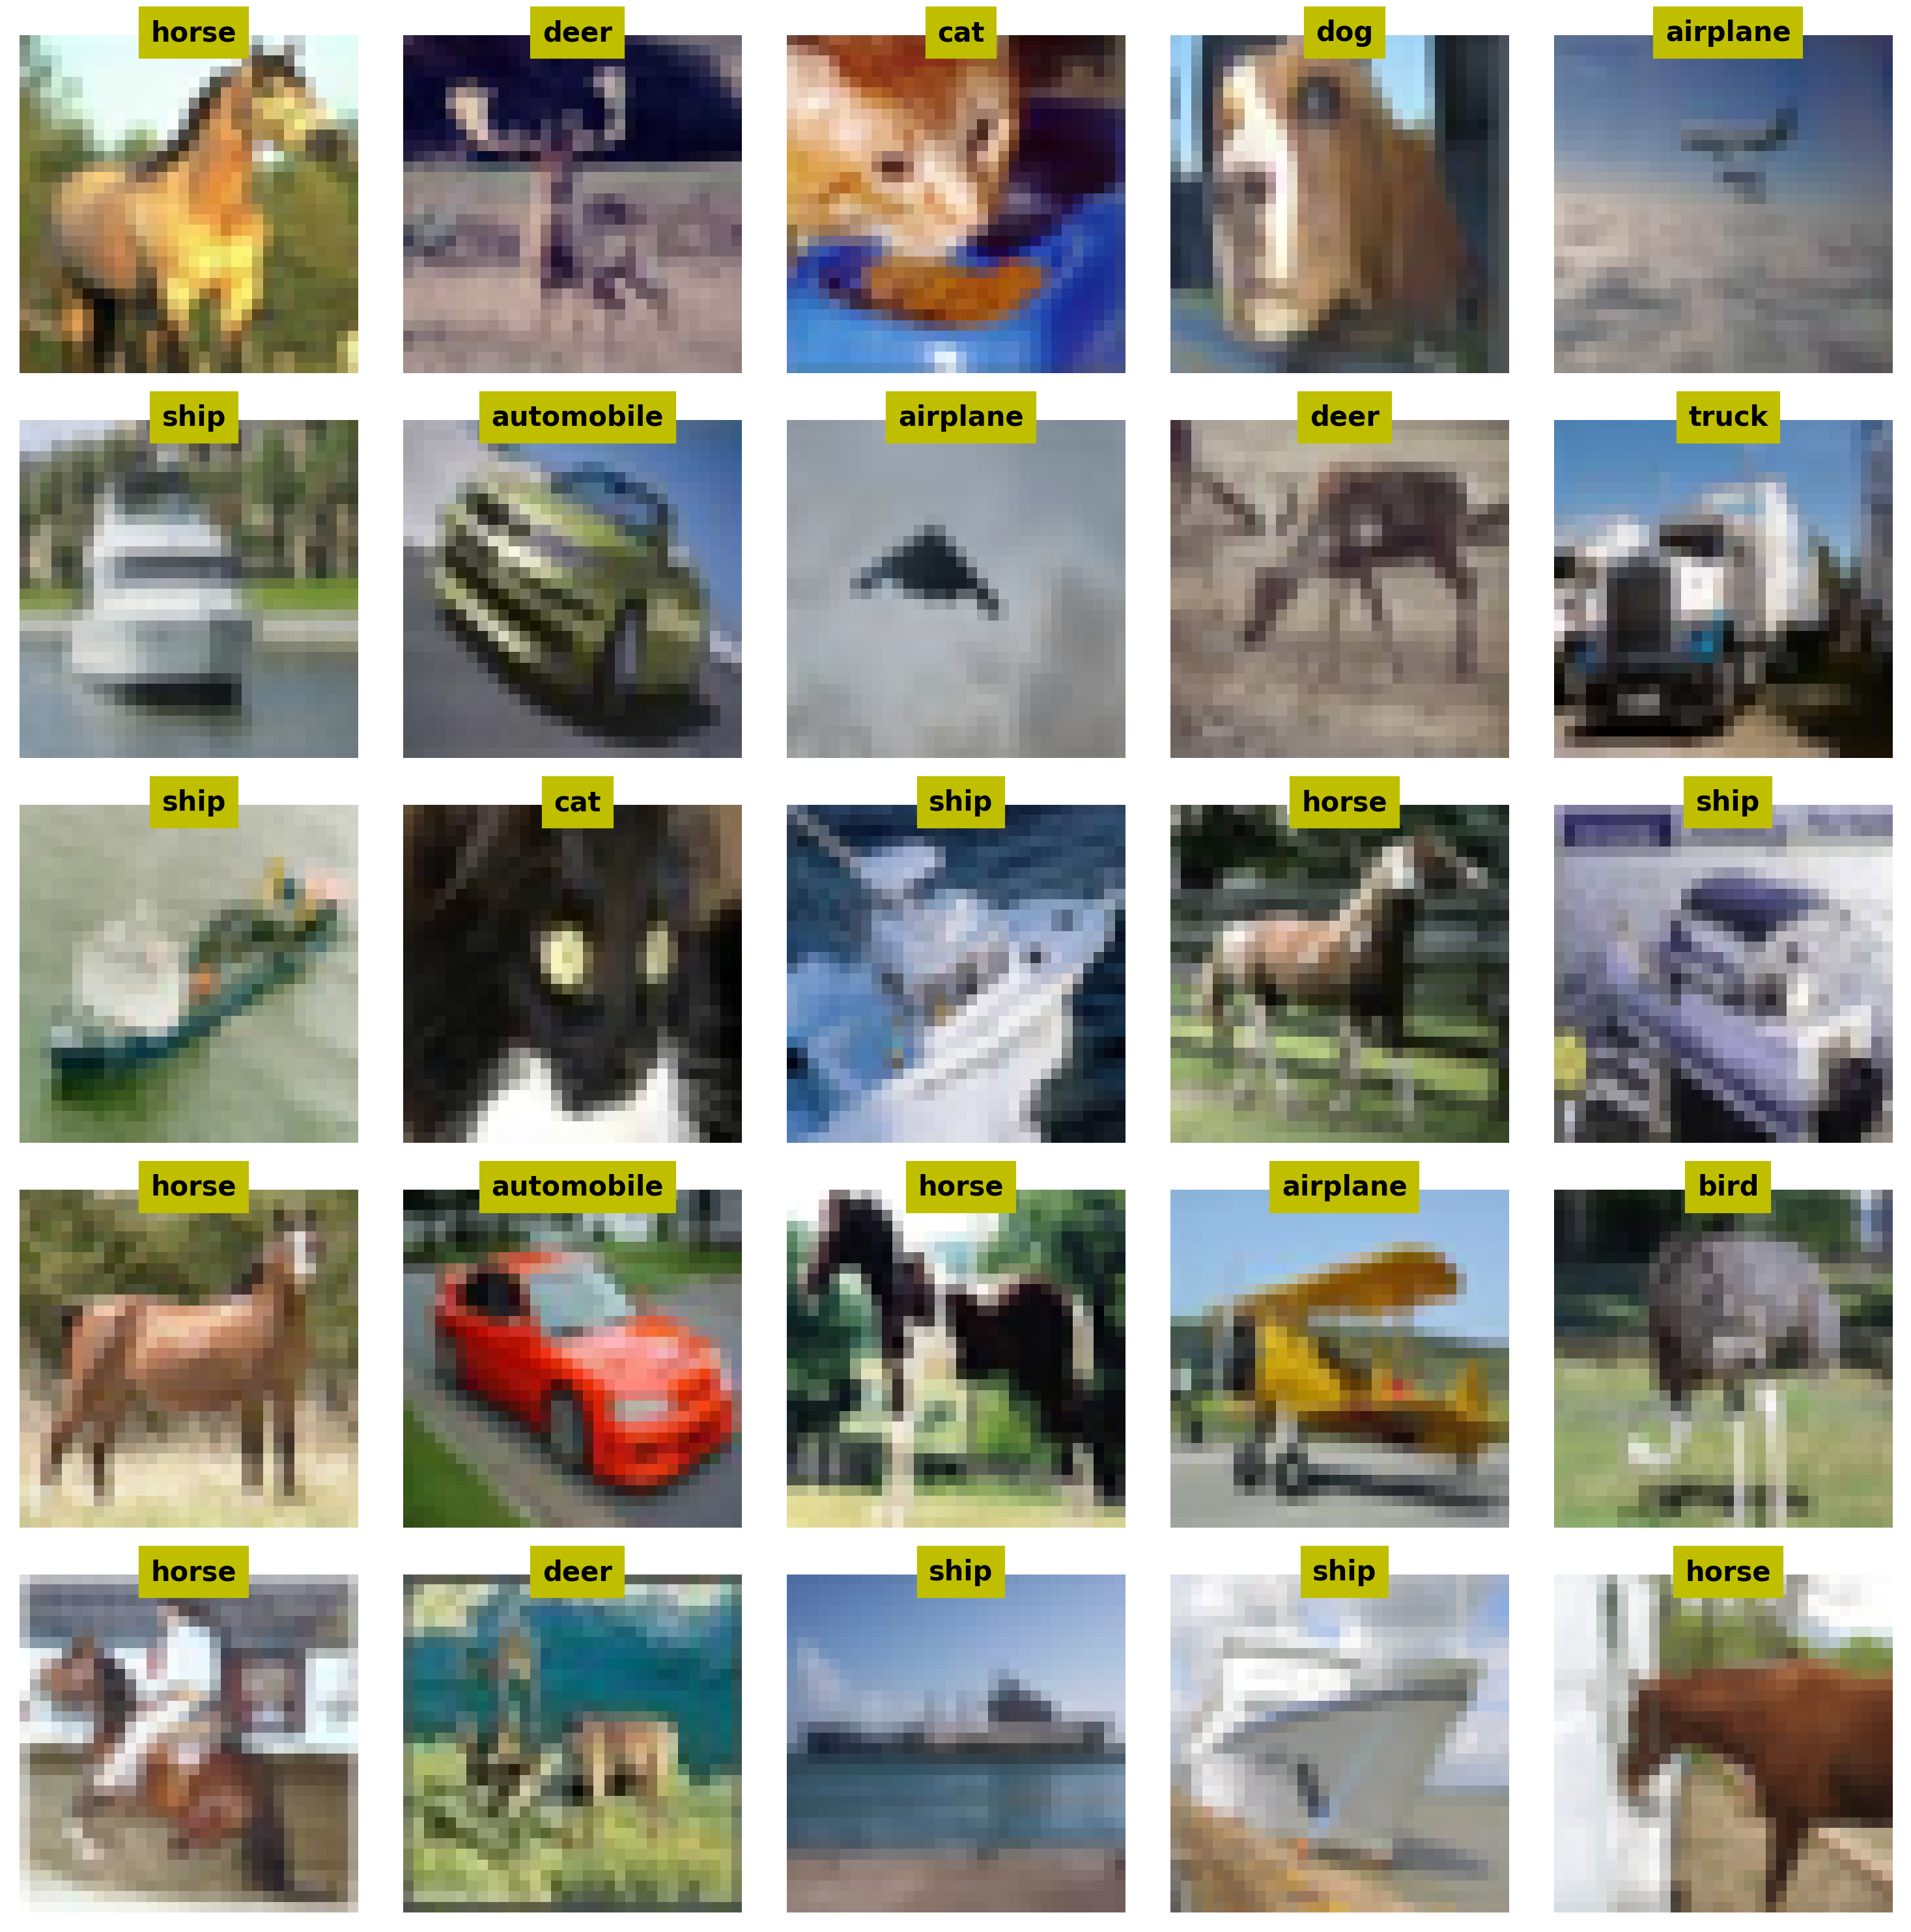

In [9]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10),dpi=300)

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

# Apply transformation

In [10]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4),
                 T.Grayscale(num_output_channels=1) ])

#include the transformation in the dataset
cdata.transforms = Ts

#Can also apply the transformation while loading the data
#cdata= torchvision.datasets.CIFAR10(root='cifar10',download=True,transform=Ts)

#Adding a transform doesn't chane the image data
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


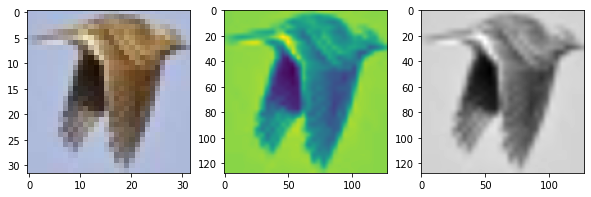

In [13]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transforms( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

In [16]:
help(T.ToTensor())

Help on ToTensor in module torchvision.transforms.transforms object:

class ToTensor(builtins.object)
 |  Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor. This transform does not support torchscript.
 |  
 |  Converts a PIL Image or numpy.ndarray (H x W x C) in the range
 |  [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
 |  if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
 |  or if the numpy.ndarray has dtype = np.uint8
 |  
 |  In the other cases, tensors are returned without scaling.
 |  
 |  .. note::
 |      Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
 |      transforming target image masks. See the `references`_ for implementing the transforms for image masks.
 |  
 |  .. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
 |  
 |  Methods defined here:
 |  
 |  __call__(self, pic)
 |      Args:
 |          pic (PIL Image or nu